# CT5133 Deep Learning Assignment 1

**Jiarong Li**

**20230033**

**1MAI1**

## Part 1: Implement Logistic Regression

**Description**

* Use Jupyter Notebook (Python or R) to implement a neural network approach to logistic regression (no hidden layers, one output node)

* Your code must handle different numbers of inputs and different numbers of training cases, but you don't have to support more than one output node

**Marking scheme**

* 1: Brief description of algorithm, including references to sources used.

* 3: Correct implementation of logistic regression (single-node neural net), including correct implementation of gradient descent, able to handle different numbers of training cases and different numbers of attributes.

### 1.1 Importing libraries

Source of this code is from Michael Madden.

In [1]:
# Packages imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

import random
import math

from tqdm import tqdm
import time

# Display plots inline and change default figure size
%matplotlib inline

### 1.2 Binary Logistic Regression Corresponds to a Single-Node Neural Network

#### 1: Brief description of algorithm, including references to sources used.

Logistic Regression is a classifier of finding the decision boundary by using the equation:

$$
\hat y=a_{w,b}(x)=f(w\cdot x+b)
$$

where $\hat y$ denotes the predicted result, $a$ represents the activation function, which needs to be differentiable for gradient descent, $w$ and $b$ are corresponding to the weights and bias, $x$ represents the input attributes.


In this assignment, I use the sigmoid function as the activation function as it can convert the straight line equation into $0$ or $1$ values and it is differentiable. The equation is:
$$
f(z)=\frac{1}{1+e^{-z}}
$$
where $z$ denotes the straight line equation.


In this assignment, the binary logistic regression was implemented by using the Log Loss function and Stochastic Gradient Decent algorithm to find the optimal weights and bias.


Reference: CT5133 Deep Learning tutorial.
 
#### 2: Implementation

In [2]:
# Initialise hyperparameter
alpha = 0.001
max_iterations = 2
num_epoch = 5
threshold = 1e-6
random.seed(2023)

classifier_threshold = 0.5

test_ratio = 0.15
val_ratio = 0.15

num_hidden_layers = 3
num_neuron = 3
epsilon = 1e-6

In [3]:
# Single node logistic regression
def singleNodeLR(
                 X, # input attributes
                 y, # labels
                 alpha = alpha,
                 #max_iterations = max_iterations,
                 threshold = threshold,
                ):
    
    # initialse weights and bias
    w = np.random.normal(size=X[0].shape) 
    b = np.random.normal()
      
    J_prev = 0.0
    J_curr = 0.0
    
    cost = 0.0
       
    # Loop for max_iterations
    for i in range(len(X)):
        
        # single example from training set selected at random
        idx = random.randrange(0, len(X), 1)
        x_idx = X[idx]
        y_idx = y[idx][0]
        
        delta_w = np.zeros(x_idx.shape)
        
        # Forward propagation stage
        z = w @ x_idx + b
        y_hat = 1 / (1 + math.exp(-z)) # calculate y_hat
        J_curr = -(y_idx * math.log(y_hat) + (1 - y_idx) * math.log(1 - y_hat)) 
        
        if abs(J_prev - J_curr) <= threshold: # Compare J_curr with J_prev: break from loop if convergence is reached
            break
             
        # Gradient Descent stage
        for j,_ in enumerate(w):
            delta_w[j] = (y_hat - y_idx) * x_idx[j] 
        
        delta_b = y_hat - y_idx
        
        for j in range(len(w)):
            w[j] -= alpha * delta_w[j]
            
        b -= alpha * delta_b
    
        cost += J_curr 
        J_prev = J_curr
                
    return w, b, cost

## Part 2: Easy Tasks

* 1: Code to read in a dataset with variable number of training cases and attributes, and divide it into a training set, validation set and testing set.
* 1: Blobs dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.
* 1: Moons dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.

### 2.1 Loading Dataset

In [4]:
# code source: sample code written by Michael Madden.

def loadDataset(data_path, transpose=False):
    # use pandas to read the CSV file as a dataframe
    df = pd.read_csv(data_path)
    
    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values
    
    # The x values are all other columns
    del df['Class'] # drop the 'Class' column from the dataframe
    X = df.values # convert the remaining columns to a numpy array
    
    if transpose is True:
        # transpose the y data using 'reshape'
        y = np.reshape(y, (len(y), 1))
    
    return X, y

### 2.2 Dividing dataset into training set, validation set and test set.

In [5]:
def split_train_test(X,
                     y,
                     test_ratio = test_ratio,
                     #train_test_seed = 123
                    ):
    
    idx = np.random.permutation(X.shape[0]) 
    sample = int(test_ratio * len(X))
    train_idx, test_idx = idx[sample:], idx[:sample]
    X_train, X_test, y_train, y_test = X[train_idx,:], X[test_idx,:], y[train_idx,], y[test_idx,]

    return X_train, X_test, y_train, y_test

### Normalize the data

In [6]:
# normalise the values in the dataset as we met a math range error problem
# Practical note: always good to normalize NN inputs (0-1 or z-Norm)
def zero_one_normalize(x):
      
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    
    return x

### Train one epoch

In [7]:
def train_one_epoch(X_train,
                    y_train,
                    test_ratio,
                    alpha,
                    threshold
                   ):
    
    train_cost = 0.0
    train_cost_avg = 0.0
    val_cost = 0.0
    val_cost_avg = 0.0
 
    # load training and validation dataset
    X_train, X_val, y_train, y_val = split_train_test(X_train, y_train, test_ratio = test_ratio)
    
    # training
    for i in range(len(X_train)):
        w, b, cost = singleNodeLR(X_train, 
                                    y_train, 
                                    alpha = alpha,
                                    threshold = threshold,
                                   )
        train_cost += cost
        
    # validation
    for i in range(len(X_val)):
        z = w @ X[i] + b
        y_hat = 1 / (1 + math.exp(-z)) # calculate y_hat
        J_curr = -(y[i][0] * math.log(y_hat) + (1 - y[i][0]) * math.log(1 - y_hat))

        val_cost += J_curr    
    
    train_cost_avg = train_cost / len(X_train)
    val_cost_avg = val_cost / len(X_val)
    
    return train_cost_avg, val_cost_avg, w, b

### Train multiple epochs

In [8]:
def train_multiple_epochs(X_train, 
                          y_train, 
                          test_ratio,
                          alpha,
                          threshold,
                          num_epoch):
    
    train_cost_avg_hist = []
    val_cost_avg_hist = []
    ws = []
    bs = []
    
    for epoch in range(num_epoch):
        train_cost_avg, val_cost_avg, w, b = train_one_epoch(X_train, y_train, test_ratio, alpha, threshold)
    
        print(f"Epoch [{epoch+1}/{num_epoch}]: Train mean cost: {train_cost_avg}, Validation mean cost: {val_cost_avg}")
        
        train_cost_avg_hist.append(train_cost_avg)
        val_cost_avg_hist.append(val_cost_avg)
        ws.append(w)
        bs.append(b)
        
    best_idx = np.argmin(val_cost_avg_hist)
        
    return ws[best_idx], bs[best_idx], val_cost_avg_hist[best_idx]

### Evaluation

In [9]:
def evaluate(preds, y, classifier_threshold):
    
    assert(len(preds) == len(y))
    
    tp = 0.0
    tn = 0.0
    fp = 0.0
    fn = 0.0
    
    preds_label = 0
    preds_labels = []
    
    for i, pred in enumerate(preds):
        if abs(pred - y[i]) <= 0.5:
            preds_label = y[i]
            preds_labels.append(preds_label)
            
    for i, preds_label in enumerate(preds_labels):
        if preds_label == y[i] == 0:
            tp += 1
        elif preds_label == y[i] == 1:
            tn += 1
        elif preds_label == 0 and y[i] == 1:
            fp += 1
        elif preds_label == 1 and y[i] == 0:
            fn += 1
    
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    accuracy = (tp + tn) / (tp + tn + fp + fn + epsilon)
    f1 = (2 * tp) / (2 * tp + fp + fn + epsilon)
    
    return precision, recall, accuracy, f1

### Test

In [10]:
def test(X_test, y_test, best_w, best_b):
    cost = []
    preds = []
    X_test = zero_one_normalize(X_test)
    
    for i in range(len(X_test)):
        z = best_w @ X_test[i] + best_b
        y_hat = 1 / (1 + math.exp(-z)) # calculate y_hat
        J_curr = -(y[i][0] * math.log(y_hat) + (1 - y[i][0]) * math.log(1 - y_hat))

        cost.append(abs(J_curr))
        preds.append(y_hat)
    
    # confusion matrix
    precision, recall, accuracy, f1 = evaluate(preds, y_test, classifier_threshold=classifier_threshold)
    
    print(f"\n\nClassification report:  precision: {precision:.2f}, recall: {recall:.2f}, accuracy: {accuracy:.2f}, f1: {f1:.2f}\n")

### 2.3 Blobs dataset

#### Train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them

In [11]:
# load moon dataset 
X, y = loadDataset('blobs400.csv', transpose=True)

# split it into train, validation and test dataset 
X_train, X_test, y_train, y_test = split_train_test(X, y, test_ratio=test_ratio)
X_train, X_val, y_train, y_val = split_train_test(X_train, y_train, test_ratio=val_ratio)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
print(f"X.shape = {X.shape}, y.shape = {y.shape}, Classes = {np.unique(y)}")

(289, 3) (289, 1) (51, 3) (51, 1) (60, 3) (60, 1)
X.shape = (400, 3), y.shape = (400, 1), Classes = [0 1]


In [12]:
# training and validation
best_w, best_b, val_cost_avg_lowest = train_multiple_epochs(X_train, 
                                      y_train, 
                                      test_ratio=test_ratio, 
                                      num_epoch=num_epoch, 
                                      alpha=alpha, 
                                      #max_iterations=max_iterations, 
                                      threshold=threshold)

print(f"best_w: {best_w}, best_b: {best_b}, lowest mean validation cost: {val_cost_avg_lowest}")

Epoch [1/5]: Train mean cost: 311.59076532569173, Validation mean cost: 1.3828556132155343
Epoch [2/5]: Train mean cost: 320.335197620276, Validation mean cost: 1.4461493323713146
Epoch [3/5]: Train mean cost: 294.95740076407026, Validation mean cost: 0.9542190489032816
Epoch [4/5]: Train mean cost: 325.74015520050887, Validation mean cost: 1.751082210995327
Epoch [5/5]: Train mean cost: 331.5319447620745, Validation mean cost: 0.5332733529382775
best_w: [-0.59958113 -1.58792345  0.32419377], best_b: 1.7972628105756832, lowest mean validation cost: 0.5332733529382775


In [13]:
# testing
test(X_test, y_test, best_w, best_b)



Classification report:  precision: 0.50, recall: 0.06, accuracy: 0.48, f1: 0.11



There are $400$ data in Blobs dataset with $3$ attributes and $1$ label for each data. We separate the dataset into a training set ($70\%$), validation set ($15\%$) and testing set ($15\%$). I trained the logistic regression node for $5$ epochs with the length of training data times per epoch. The precision value is $0.5$, the recall value is $0.06$, the accuracy value is $0.48$ and the f1 score is $0.11$.

### 2.4 Moons dataset

#### Train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.

In [14]:
# load moon dataset 
X, y = loadDataset('moons500.csv', transpose=True)

# split it into train, validation and test dataset 
X_train, X_test, y_train, y_test = split_train_test(X, y, test_ratio=test_ratio)
X_train, X_val, y_train, y_val = split_train_test(X_train, y_train, test_ratio=val_ratio)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
print(f"X.shape = {X.shape}, y.shape = {y.shape}, Classes = {np.unique(y)}")

(362, 2) (362, 1) (63, 2) (63, 1) (75, 2) (75, 1)
X.shape = (500, 2), y.shape = (500, 1), Classes = [0 1]


In [15]:
# training and validation
best_w, best_b, val_cost_avg_lowest = train_multiple_epochs(X_train, 
                                      y_train, 
                                      test_ratio=test_ratio, 
                                      num_epoch=num_epoch, 
                                      alpha=alpha, 
                                      #max_iterations=max_iterations, 
                                      threshold=threshold)

print(f"best_w: {best_w}, best_b: {best_b}, lowest mean validation cost: {val_cost_avg_lowest}")

Epoch [1/5]: Train mean cost: 284.6438414240878, Validation mean cost: 0.902803128704712
Epoch [2/5]: Train mean cost: 279.03353013178463, Validation mean cost: 0.6850036480611864
Epoch [3/5]: Train mean cost: 270.2455036688216, Validation mean cost: 0.7049283305331882
Epoch [4/5]: Train mean cost: 272.3554845188792, Validation mean cost: 0.6275679955096657
Epoch [5/5]: Train mean cost: 279.496933052178, Validation mean cost: 1.303215280668152
best_w: [ 0.92665592 -0.19270235], best_b: 0.7965577695726962, lowest mean validation cost: 0.6275679955096657


In [16]:
# testing
test(X_test, y_test, best_w, best_b)



Classification report:  precision: 0.00, recall: 0.00, accuracy: 0.40, f1: 0.00



There are $500$ data in Blobs dataset with $2$ attributes and $1$ label for each data. We separate the dataset into a training set ($70\%$), validation set ($15\%$) and testing set ($15\%$). I trained the logistic regression node for $5$ epochs with the length of training data times per epoch. The precision value is $0.00$, the recall value is $0.00$, the accuracy value is $0.40$ and the f1 score is $0.00$.

## Part 3 – Implement Shallow NN: 5 marks

* Brief description of algorithm, including references to sources used.
    
* Correct implementation of a feed-forward neural network with 1 hidden layer and a standard kernel such as sigmoid, including backprop, extending your previous implementation of logistic regression.
    
* Train and test on the Blobs and Moons datasets, present results, and make observations on results.

### 3.1 Brief description of algorithm, including references to sources used.

There is an input layer, a hidden layer with a customised number of neuron nodes, and an output layer with an output neuron node in this Shallow NN model. 

In each neuron node instance, there are feedforward() function to save the parameters and output, gradient_descent() function to calculate the delta_w and delta_b by using the derivative of activation function, and update_parameter() function to update the parameters of each neuron instance.

This Shallow NN model is trained with forward_propagation() and backpropagation() functions by using the chain rule of calculating the partial derivative of the parameters in each neuron instance. There is a predict() function to predict the unseen data.

### 3.2 Logistic regression with 1 hidden layer 

#### 3.2.1 Entend the code of singleNodeLR from part 1

In [17]:
class SingleNeuronLR():
    
    def __init__(self, 
                 output_layer = True,
                 **kwargs,
                ):
        
        self.output_layer = output_layer
        self.alpha = alpha        
        
    def sigmoid(self, z):
        
        try:
            a = 1 / (1 + math.exp(-z))
        except OverflowError:
            a = float('inf')
         
        return a
    
    def derivative_sigmoid(self, z):
        derivate_z = self.sigmoid(z) * (1 - self.sigmoid(z))
        return derivate_z
        
    def feedforward(self, x_idx, y_idx):
        
        self.x_idx = x_idx
        self.y_idx = y_idx
        
        # initialse weights and bias
        self.w = np.random.normal(size=(len(self.x_idx), 1))
        self.b = np.random.normal()
        
        self.delta_w = np.zeros(self.x_idx.shape)
        self.delta_b = 0
                
        self.z = self.w.T @ self.x_idx + self.b
        self.a = self.sigmoid(self.z)
        
        return self.w, self.b, self.z, self.a
    
    def gradient_descent(self):
        
        if self.output_layer == True:
            
            for i,_ in enumerate(self.w):
                self.delta_z = self.a - self.y_idx
                self.delta_w[i] = self.delta_z * self.x_idx[i] 

            self.delta_b = self.delta_z
            
        else:
            for j,_ in enumerate(self.w):
                self.delta_z = self.derivative_sigmoid(self.z) * sum((self.a - self.y_idx) * self.w)
                self.delta_w[j] = self.delta_z * self.x_idx[j]
               
            self.delta_b = self.delta_z
            
    def update_parameters(self):
        for j in range(len(self.w)):
            self.w[j] -= self.alpha * self.delta_w[j]
            
        self.b -= self.alpha * self.delta_b

#### 3.2.2 Shallow NN

In [18]:
class ShallowNN():
    
    def __init__(self,
                 num_neuron = num_neuron,
                 **kwargs,
                 ):
        
        self.num_neuron = num_neuron

        self.a_list = []
        self.srl_list = []
        
        for i in range(self.num_neuron):
            slr = SingleNeuronLR(output_layer=False)
            self.srl_list.append(slr)

        # output layer with one neuron
        self.output_slr = SingleNeuronLR(output_layer=True)
        
    def forward_propagation(self, x_idx, y_idx):
        
        # first hidden layer
        for i in range(len(self.srl_list)):
            self.w, self.b, self.z, self.a = self.srl_list[i].feedforward(x_idx, y_idx)
            self.a_list.append(self.a)

        self.w, self.b, self.z, self.a = self.output_slr.feedforward(x_idx=np.asarray(self.a_list[-self.num_neuron:]), y_idx=y_idx)
        self.a_list.append(self.a)

            
    def backpropagation(self):
        
        # output layer
        self.output_slr.gradient_descent()
        self.output_slr.update_parameters()
        
        # hidden layer
        for i in range(len(self.srl_list)):
            self.srl_list[i].gradient_descent()
            self.srl_list[i].update_parameters()
        
    def fit(self, x_idx, y_idx):
        
        self.x_idx = x_idx
        self.y_idx = y_idx
        
        self.forward_propagation(self.x_idx, self.y_idx)
        self.backpropagation()
            
    def predict(self, x_idx):
        
        # hidden layer
        pred_hidden_list = []
        for i in range(len(self.srl_list)):
            _, _, _, pred_hidden = self.srl_list[i].feedforward(x_idx= x_idx, y_idx=self.y_idx)
            pred_hidden_list.append(pred_hidden)
            
        # output layer
        _, _, _, pred = self.output_slr.feedforward(x_idx = np.asarray(pred_hidden_list), y_idx=self.y_idx)
            
        return pred

### Train and test function.

In [19]:
def rewrite_train_one_epoch(X_train,
                            y_train,
                            test_ratio,
                            alpha,
                            threshold,
                            num_neuron,
                            model,
                           ):
    
    train_cost = 0.0
    train_cost_avg = 0.0
    val_cost = 0.0
    val_cost_avg = 0.0
    iters = 0
    
    J_curr = 0.0
     
    # load training and validation dataset
    X_train, X_val, y_train, y_val = split_train_test(X_train, y_train, test_ratio = test_ratio)
    
    # normalize dataset
    X_train = zero_one_normalize(X_train)
    X_val = zero_one_normalize(X_val)
        
    # training
    for j in tqdm(range(len(X_train))):
        iters += 1
        
        idx = random.randrange(0, len(X_train), 1)
        x_train_idx = X_train[idx]
        y_train_idx = y_train[idx][0]
                
        mymodel.fit(x_train_idx, y_train_idx)
        pred = mymodel.predict(x_train_idx)
        J_curr = -(y_train_idx * math.log(pred + epsilon) + (1 - y_train_idx) * math.log(1 - pred + epsilon))
        
        train_cost += J_curr
        
    # validation
    for i in tqdm(range(len(X_val))):
        idx = random.randrange(0, len(X_val), 1)
        x_val_idx = X_val[idx]
        y_val_idx = y_val[idx][0]
        
        pred = mymodel.predict(x_val_idx)
        J_curr = -(y_val_idx * math.log(pred + epsilon) + (1 - y_val_idx) * math.log(1 - pred + epsilon))
        
        val_cost += J_curr
    
    # calculate the mean cost of training and validation
    train_cost_avg = train_cost / len(X_train)
    val_cost_avg = val_cost / len(X_val)
    
    return train_cost_avg, val_cost_avg

In [20]:
def rewrite_train_multiple_epochs(X_train,
                                 y_train,
                                 test_ratio,
                                 alpha,
                                 #max_iterations,
                                 threshold,
                                 num_neuron,
                                 num_epoch,
                                 model,
                                 ):
    
    train_cost_avg_hist = []
    val_cost_avg_hist = []
        
    for epoch in range(num_epoch):
        train_cost_avg, val_cost_avg = rewrite_train_one_epoch(X_train=X_train,
                                                               y_train=y_train,
                                                               test_ratio=test_ratio,
                                                               alpha=alpha,
                                                               #max_iterations=max_iterations,
                                                               threshold=threshold,
                                                               num_neuron=num_neuron,
                                                               model = mymodel,
                                                              )
        
        
        print(f"Epoch [{epoch+1}/{num_epoch}]: Train mean cost: {train_cost_avg}, Validation mean cost: {val_cost_avg}")
        
        train_cost_avg_hist.append(train_cost_avg)
        val_cost_avg_hist.append(val_cost_avg)
        
        if epoch > 1:
            if abs(train_cost_avg_hist[-1] - train_cost_avg_hist[-2]) <= threshold:
                break
    
    # plot
    plt.plot(train_cost_avg_hist)
    plt.plot(val_cost_avg_hist)
    plt.title('model loss')
    plt.ylabel('mean loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show() 

In [21]:
def rewrite_test(X_test, y_test, model, 
                 classifier_threshold
                ):
    cost = []
    preds = []
    X_test = zero_one_normalize(X_test)
    #random.seed(seed)
    
    for i in range(len(X_test)):
        idx = random.randrange(0, len(X_test), 1)
        x_test_idx = X_test[idx]
        y_test_idx = y_test[idx][0]
        pred = mymodel.predict(x_test_idx)
        J_curr = -(y_test_idx * math.log(pred + epsilon) + (1 - y_test_idx) * math.log(1 - pred + epsilon)) 

        #cost.append(abs(J_curr))
        cost.append(J_curr)
        preds.append(pred)
        
    #print(f"\n\nThe mean cost of test dataset is {sum(cost) / len(X_test)}\n")
    
    # confusion matrix
    precision, recall, accuracy, f1 = evaluate(preds, y_test, classifier_threshold=classifier_threshold)
    
    print(f"\n\nClassification report:  precision: {precision:.2f}, recall: {recall:.2f}, accuracy: {accuracy:.2f}, f1: {f1:.2f}\n")

In [22]:
def evaluate(preds, y, classifier_threshold):
    
    assert(len(preds) == len(y))
    
    tp = 0.0
    tn = 0.0
    fp = 0.0
    fn = 0.0
    
    preds_label = 0
    preds_labels = []
    
    for i, pred in enumerate(preds):
        if abs(pred - y[i]) <= 0.5:
            preds_label = y[i]
            preds_labels.append(preds_label)
            
    for i, preds_label in enumerate(preds_labels):
        if preds_label == y[i] == 0:
            tp += 1
        elif preds_label == y[i] == 1:
            tn += 1
        elif preds_label == 0 and y[i] == 1:
            fp += 1
        elif preds_label == 1 and y[i] == 0:
            fn += 1
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = (2 * tp) / (2 * tp + fp + fn)
    
    return precision, recall, accuracy, f1

#### 3.3.1 Train and test on the Blobs datasets

In [23]:
# load blobs dataset (linearly separable data) 
X, y = loadDataset('blobs400.csv', transpose=True)

# split it into train, validation and test dataset 
X_train, X_test, y_train, y_test = split_train_test(X, y, test_ratio=test_ratio)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f"X.shape = {X.shape}, y.shape = {y.shape}, Classes = {np.unique(y)}")

(340, 3) (340, 1) (60, 3) (60, 1)
X.shape = (400, 3), y.shape = (400, 1), Classes = [0 1]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 26900.09it/s]


Epoch [1/5]: Train mean cost: 0.868436839347877, Validation mean cost: 0.9372105334237756


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 29282.62it/s]


Epoch [2/5]: Train mean cost: 0.8983316219857614, Validation mean cost: 0.90279226305294


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 31564.04it/s]


Epoch [3/5]: Train mean cost: 0.939694299942351, Validation mean cost: 0.8299567550223383


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 34434.88it/s]


Epoch [4/5]: Train mean cost: 0.8437660528465916, Validation mean cost: 0.8877861520048819


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 12491.07it/s]


Epoch [5/5]: Train mean cost: 0.9069323749712732, Validation mean cost: 0.678437392613295


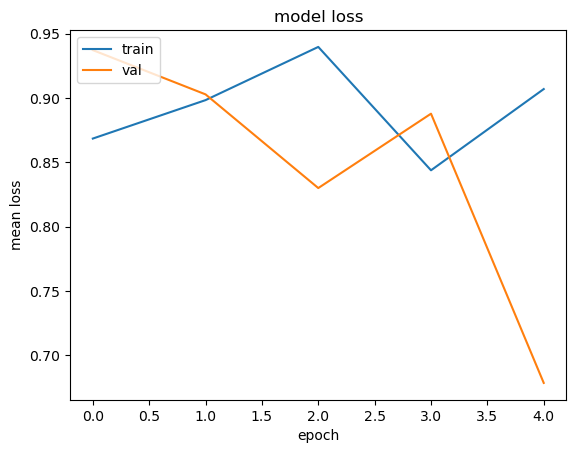

In [24]:
# create a model
mymodel = ShallowNN(num_neuron = num_neuron)

# train and validation
rewrite_train_multiple_epochs(X_train=X_train,
                            y_train=y_train,
                            test_ratio=test_ratio,
                            alpha=alpha,
                            #max_iterations=max_iterations,
                            threshold=threshold,
                            num_neuron=num_neuron,
                            num_epoch = num_epoch,
                            model = mymodel,
                            #seed = seed
                             )

In [25]:
# evaluation
rewrite_test(X_test, y_test, mymodel, 
             classifier_threshold=classifier_threshold
            )



Classification report:  precision: 0.33, recall: 0.38, accuracy: 0.31, f1: 0.36



We apply the model with one hidden layer and three neural nodes to the Blobs dataset, the precision value of the model is $0.33$, the recall value of the model is $0.38$, the accuracy value of the model is $0.31$, the f1 value of the model is $0.36$.

#### 3.3.2 Train and test on the Moons datasets

In [26]:
# load moon dataset (not linearly separable)
X, y = loadDataset('moons500.csv', transpose=True)

# split it into train, validation and test dataset 
X_train, X_test, y_train, y_test = split_train_test(X, y, test_ratio=test_ratio)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f"X.shape = {X.shape}, y.shape = {y.shape}, Classes = {np.unique(y)}")

(425, 2) (425, 1) (75, 2) (75, 1)
X.shape = (500, 2), y.shape = (500, 1), Classes = [0 1]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 14065.85it/s]


Epoch [1/5]: Train mean cost: 0.8974864964047837, Validation mean cost: 0.869529421068279


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 22744.12it/s]


Epoch [2/5]: Train mean cost: 0.8886229939169044, Validation mean cost: 1.0407107221359058


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 35960.96it/s]


Epoch [3/5]: Train mean cost: 0.9222827915929938, Validation mean cost: 0.8846720245512715


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 31079.88it/s]


Epoch [4/5]: Train mean cost: 0.9631360516048343, Validation mean cost: 0.7661741615644899


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 51629.77it/s]


Epoch [5/5]: Train mean cost: 0.8736695048883883, Validation mean cost: 0.8534642612846575


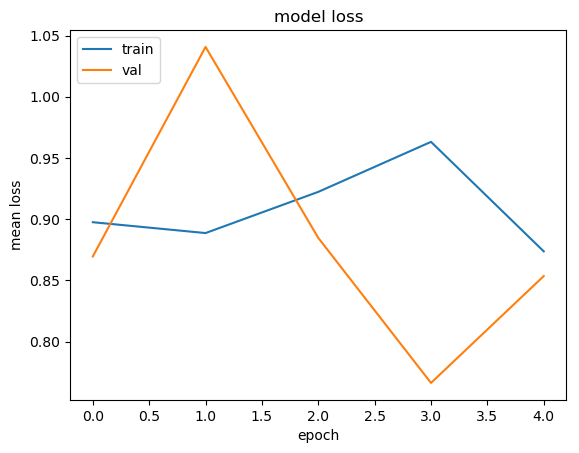

In [27]:
# create a model
mymodel = ShallowNN(num_neuron = num_neuron)

# train and validation
rewrite_train_multiple_epochs(X_train=X_train,
                            y_train=y_train,
                            test_ratio=test_ratio,
                            alpha=alpha,
                            #max_iterations=max_iterations,
                            threshold=threshold,
                            num_neuron=num_neuron,
                            num_epoch = num_epoch,
                            model = mymodel,
                            )

In [28]:
# evaluation
rewrite_test(X_test, y_test, mymodel, 
             classifier_threshold=classifier_threshold
            )



Classification report:  precision: 0.55, recall: 0.58, accuracy: 0.45, f1: 0.56



We apply the model with one hidden layer and three neural nodes to the Moons dataset, the precision value of the model is $0.55$, the recall value of the model is $0.58$, the accuracy value of the model is $0.45$, the f1 value of the model is $0.56$.

## Part 4 – Challenging Task: 3 marks

* 1: Code to read in the big dataset, and sample subsets for training, validation and testing. 

* 1: Train the NN, tune on the validation set if required, and test on the test set.

* 1: Present results and make observations on your testing.


### 4.1 Load data and data preprocessing

#### 4.1.1 Load data

In [29]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

import gzip
import os

def load_fashion_mnist(path="fashion_mnist_data", kind='train'):
    
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                              offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                              offset=16).reshape(len(labels), 784) # each image is 28x28 = 784 pixels.
        
    return images, labels

In [30]:
(train60k_imgs, train60k_labels) = load_fashion_mnist(path="fashion_mnist_data", kind='train')
print(f"Shape of images is {train60k_imgs.shape}, labels is {train60k_labels.shape}")

(t10k_imgs, t10k_labels) = load_fashion_mnist(path="fashion_mnist_data", kind='t10k')
print(f"Shape of images is {t10k_imgs.shape}, labels is {t10k_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)
Shape of images is (10000, 784), labels is (10000,)


#### Extract and combine the data with certain pair of classes - Shirt and Bag - from original data to create a new training data.

In [31]:
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
def load_shirt_bag_data(X, y, shirt_label, bag_label):
    
    shirt_labels_idx = np.where(y==shirt_label)[0]
    bag_labels_idx = np.where(y==bag_label)[0]
    
    shirts = []
    bags = []
    
    for idx in shirt_labels_idx:
        shirts.append(X[idx])

    shirts = np.array(shirts)
      
    for idx in bag_labels_idx:
        bags.append(X[idx])

    bags = np.array(bags)
    
    shirt_labels = np.ones((shirts.shape[0],)) # labels are 1s
    bag_labels = np.zeros((bags.shape[0],)) # labels are 0s
    
    X_conbined = np.concatenate((bags, shirts))
    y_conbined = np.concatenate((bag_labels, shirt_labels))

    return X_conbined, y_conbined

In [33]:
train_X_combined, train_y_combined = load_shirt_bag_data(X=train60k_imgs, y=train60k_labels, shirt_label=6, bag_label=8)

In [34]:
test_X_combined, test_y_combined = load_shirt_bag_data(X=t10k_imgs, y=t10k_labels, shirt_label=6, bag_label=8)

#### 4.1.2 Sample subsets for training, validation and testing

We don't need to split training dataset into training dataset and validation dataset here because we have written the split function in the training method code. Therefore, we take the subset of bags and shirts training dataset as input and feed them into our training process later.

In [35]:
X_train = train_X_combined
y_train = train_y_combined.reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)

(12000, 784)
(12000, 1)


We use test_X_combined and test_y_combined as our testing dataset.

In [36]:
X_test = test_X_combined
y_test = test_y_combined.reshape(-1, 1)

print(X_test.shape)
print(y_test.shape)

(2000, 784)
(2000, 1)


### 4.2 Train the NN, tune on the validation set if required, and test on the test set.

100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 18734.00it/s]


Epoch [1/5]: Train mean cost: 0.9256926240542064, Validation mean cost: 0.9480018404474706


100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 19064.34it/s]


Epoch [2/5]: Train mean cost: 0.9277535046947244, Validation mean cost: 0.931864787264322


100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 17413.34it/s]


Epoch [3/5]: Train mean cost: 0.9220846367580479, Validation mean cost: 0.9636945562206323


100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 17618.73it/s]


Epoch [4/5]: Train mean cost: 0.9297842208947201, Validation mean cost: 0.892890054085527


100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 16738.12it/s]

Epoch [5/5]: Train mean cost: 0.9331130033410993, Validation mean cost: 0.913795935374961


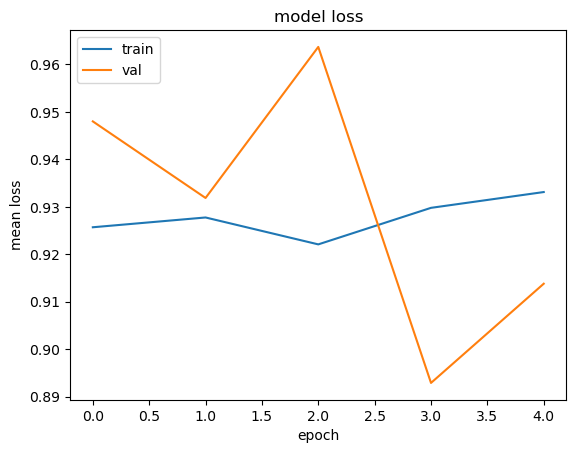

In [37]:
# create a model
mymodel = ShallowNN(num_neuron = num_neuron)

# train and validation
rewrite_train_multiple_epochs(X_train=X_train,
                            y_train=y_train,
                            test_ratio=test_ratio,
                            alpha=alpha,
                            threshold=threshold,
                            num_neuron=num_neuron,
                            num_epoch = num_epoch,
                            model = mymodel)

### 4.3 Present results and make observations on testing.

In [38]:
# evaluation
rewrite_test(X_test, y_test, mymodel, 
             classifier_threshold=classifier_threshold
            )



Classification report:  precision: 1.00, recall: 0.50, accuracy: 0.50, f1: 0.67



In this case, the model is a classifier of distinguishing bag class and shirt class. The model here is an instance of the Shallow model class with one hidden layer and three neural nodes. The dataset is balanced and we use 12,000 data for training and 2000 data for testing. The classification report on the test dataset ($2000$) is shown above. The precision value is $1.00$, the recall value is $0.50$, the accuracy value is $0.50$ and the f1 score is $0.67$.

## Part 5 – Deep Learning Enhancements: 5 marks

* 1: Brief description of your enhancement to the algorithm, including references used.

* 3: Correct implementation of your enhancement.

* 1: Preform new training and testing on the big dataset, present results, and make observations on your testing.

### 5.1 Brief description of your enhancement to the alhorithm.

I use early stopping enhancement to the algorithm. In the early stage of Neural Network training, overfitting can become a problem as the training processes, even though it is far from converging. I apply the early stopping technique by storing the best parameter which leads to less loss after each validation training. Then store the best parameters ever at the end of training. In the testing process, the model can apply the best parameters to make a good performance.

Reference: CT5133 Deep Learning

### 5.2 Rewrite the NN with arbitray number of hidden layers and arbitray number of nodes

In [39]:
class MyNN():
    
    def __init__(self,
                 num_neuron = num_neuron,
                 num_hidden_layers = num_hidden_layers,
                 **kwargs,
                 ):
        
        self.num_neuron = num_neuron
        self.num_hidden_layers = num_hidden_layers

        self.a_list = []
        self.srl_list = []
        
        for j in range(self.num_hidden_layers):
            for i in range(self.num_neuron):
                slr = SingleNeuronLR(output_layer=False)
                self.srl_list.append(slr)
        
        # output layer with one neuron
        self.output_slr = SingleNeuronLR(output_layer=True)
        
    def forward_propagation(self, x_idx, y_idx):
        
        for i in range(len(self.srl_list)):
            self.w, self.b, self.z, self.a = self.srl_list[i].feedforward(x_idx, y_idx)
            self.a_list.append(self.a)

        self.w, self.b, self.z, self.a = self.output_slr.feedforward(x_idx=np.asarray(self.a_list[-self.num_neuron:]), y_idx=y_idx)
        self.a_list.append(self.a)
  
            
    def backpropagation(self):
        
        # output layer
        self.output_slr.gradient_descent()
        self.output_slr.update_parameters()
        
        # hidden layer
        for i in range(len(self.srl_list)):
            self.srl_list[i].gradient_descent()
            self.srl_list[i].update_parameters()
            

    def fit(self, x_idx, y_idx):
        
        self.x_idx = x_idx
        self.y_idx = y_idx
        
        self.forward_propagation(self.x_idx, self.y_idx)
        self.backpropagation()
        
    
    def predict(self, x_idx):
        
        # hidden layer
        pred_hidden_list = []
        for i in range(len(self.srl_list)):
            _, _, _, pred_hidden = self.srl_list[i].feedforward(x_idx= x_idx, y_idx=self.y_idx)
            pred_hidden_list.append(pred_hidden)
            
        # output layer
        _, _, _, pred = self.output_slr.feedforward(x_idx = np.asarray(pred_hidden_list), y_idx=self.y_idx)
            
        return pred

### 5.3 Deep Learning Enhancements

I use early stoppong in this case.

In [40]:
def train_one_epoch_early_stopping(X_train,
                                    y_train,
                                    test_ratio,
                                    alpha,
                                    threshold,
                                    num_neuron,
                                    model,
                                   ):
    
    train_cost = 0.0
    train_cost_avg = 0.0
    val_cost = 0.0
    val_cost_avg = 0.0
    iters = 0
    
    J_curr = 0.0
    J_prev = [] # early_stopping
    best_param = [] # early_stopping
            
 
    # load training and validation dataset
    X_train, X_val, y_train, y_val = split_train_test(X_train, y_train, test_ratio = test_ratio)
    
    # normalize dataset
    X_train = zero_one_normalize(X_train)
    X_val = zero_one_normalize(X_val)
    
        
    # training
    for j in tqdm(range(len(X_train))):
        
        iters += 1
        
        idx = random.randrange(0, len(X_train), 1)
        x_train_idx = X_train[idx]
        y_train_idx = y_train[idx][0]
                
        mymodel.fit(x_train_idx, y_train_idx)
        pred = mymodel.predict(x_train_idx)
        J_curr = -(y_train_idx * math.log(pred + epsilon) + (1 - y_train_idx) * math.log(1 - pred + epsilon))
        
        train_cost += J_curr
                      
        
    # validation
    for i in tqdm(range(len(X_val))):
        
        idx = random.randrange(0, len(X_val), 1)
        x_val_idx = X_val[idx]
        y_val_idx = y_val[idx][0]
        
        pred = mymodel.predict(x_val_idx)
        J_curr = -(y_val_idx * math.log(pred + epsilon) + (1 - y_val_idx) * math.log(1 - pred + epsilon))
        
        val_cost += J_curr
        
        if len(J_prev) >= 1: # early_stopping
            if J_curr < J_prev[0]:
                best_param = mymodel.srl_list
        
        J_prev.append(J_curr)
    
    # calculate the mean cost of training and validation
    train_cost_avg = train_cost / len(X_train)
    val_cost_avg = val_cost / len(X_val)
    
    return train_cost_avg, val_cost_avg, best_param

In [41]:
def train_multiple_epoch_early_stopping(X_train,
                                         y_train,
                                         test_ratio,
                                         alpha,
                                         threshold,
                                         num_neuron,
                                         num_epoch,
                                         model,
                                         ):
    
    train_cost_avg_hist = []
    val_cost_avg_hist = []
        
    for epoch in range(num_epoch):
        
        train_cost_avg, val_cost_avg, best_param = train_one_epoch_early_stopping(X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   test_ratio=test_ratio,
                                                                                   alpha=alpha,
                                                                                   threshold=threshold,
                                                                                   num_neuron=num_neuron,
                                                                                   model = mymodel,
                                                                                  )
        
        
        print(f"Epoch [{epoch+1}/{num_epoch}]: Train mean cost: {train_cost_avg}, Validation mean cost: {val_cost_avg}")
        
        train_cost_avg_hist.append(train_cost_avg)
        val_cost_avg_hist.append(val_cost_avg)
        
        if epoch > 1:
            if abs(train_cost_avg_hist[-1] - train_cost_avg_hist[-2]) <= threshold:
                break
        
    # plot
    plt.plot(train_cost_avg_hist)
    plt.plot(val_cost_avg_hist)
    plt.title('model loss')
    plt.ylabel('mean loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show() 
    
    return best_param

In [42]:
def test_early_stopping(X_test, y_test, model, 
                         classifier_threshold,
                         best_param
                        ):
    cost = []
    preds = []
    X_test = zero_one_normalize(X_test)
    
    if len(best_param) != 0:
        model.srl_list = best_param # assign best parameters to the model
    
    for i in range(len(X_test)):
        idx = random.randrange(0, len(X_test), 1)
        x_test_idx = X_test[idx]
        y_test_idx = y_test[idx][0]
        pred = model.predict(x_test_idx)
        J_curr = -(y_test_idx * math.log(pred + epsilon) + (1 - y_test_idx) * math.log(1 - pred + epsilon)) 

        #cost.append(abs(J_curr))
        cost.append(J_curr)
        preds.append(pred)
            
    # confusion matrix
    precision, recall, accuracy, f1 = evaluate(preds, y_test, classifier_threshold=classifier_threshold)
    
    print(f"\n\nClassification report:  precision: {precision:.2f}, recall: {recall:.2f}, accuracy: {accuracy:.2f}, f1: {f1:.2f}\n")

### 5.3 Train the new model on fashion mnist dataset

In [46]:
# prepare data
(train60k_imgs, train60k_labels) = load_fashion_mnist(path="fashion_mnist_data", kind='train')
print(f"Shape of images is {train60k_imgs.shape}, labels is {train60k_labels.shape}")

(t10k_imgs, t10k_labels) = load_fashion_mnist(path="fashion_mnist_data", kind='t10k')
print(f"Shape of images is {t10k_imgs.shape}, labels is {t10k_labels.shape}")

label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


train_X_combined, train_y_combined = load_shirt_bag_data(X=train60k_imgs, y=train60k_labels, shirt_label=6, bag_label=8)
test_X_combined, test_y_combined = load_shirt_bag_data(X=t10k_imgs, y=t10k_labels, shirt_label=6, bag_label=8)

X_train = train_X_combined
y_train = train_y_combined.reshape(-1, 1)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_test = test_X_combined
y_test = test_y_combined.reshape(-1, 1)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

Shape of images is (60000, 784), labels is (60000,)
Shape of images is (10000, 784), labels is (10000,)
X_train.shape:  (12000, 784)
y_train.shape:  (12000, 1)
X_test.shape:  (2000, 784)
y_test.shape:  (2000, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 6737.18it/s]


Epoch [1/5]: Train mean cost: 1.1545382150932217, Validation mean cost: 1.1468811246652735


100%|███████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 6160.90it/s]


Epoch [2/5]: Train mean cost: 1.1371350844694865, Validation mean cost: 1.1785947006733353


100%|███████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 6757.40it/s]


Epoch [3/5]: Train mean cost: 1.1481183502637968, Validation mean cost: 1.174926783071488


100%|███████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 6709.18it/s]


Epoch [4/5]: Train mean cost: 1.1555086697948453, Validation mean cost: 1.147318552039889


100%|███████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:00<00:00, 6868.84it/s]


Epoch [5/5]: Train mean cost: 1.1550685285510032, Validation mean cost: 1.088329965824504


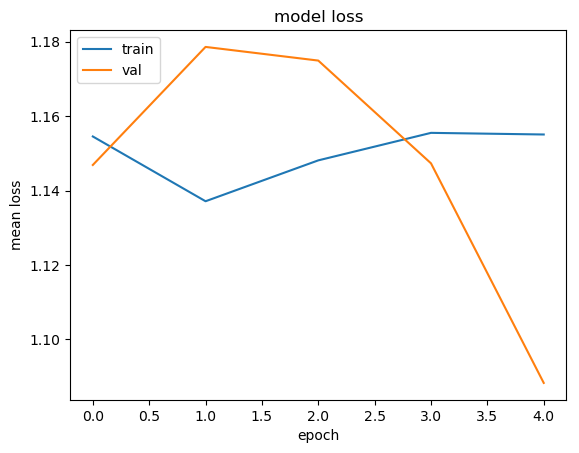

In [47]:
# create a model
mymodel = MyNN(num_neuron = num_neuron,
               num_hidden_layers = num_hidden_layers,
              )

# train and validation
best_param = train_multiple_epoch_early_stopping(X_train=X_train,
                                                 y_train=y_train,
                                                 test_ratio=test_ratio,
                                                 alpha=alpha,
                                                 threshold=threshold,
                                                 num_neuron=num_neuron,
                                                 num_epoch=num_epoch,
                                                 model=mymodel,
                                                 )

### 5.4 Test how well this works relative to the shallow NN on the image dataset

In [48]:
# evaluation
test_early_stopping(X_test=X_test, 
                    y_test=y_test, 
                    model=mymodel, 
                    classifier_threshold=classifier_threshold,
                    best_param=best_param
                    )



Classification report:  precision: 1.00, recall: 0.51, accuracy: 0.51, f1: 0.67



There are three hidden layers and three neural nodes in the part 5 neural network model. The model is a classifier of distinguishing the bag class and the shirt class. The dataset is balanced and we use 12,000 data for training and 2000 data for testing. The classification report on the test dataset ($2000$) is shown above. The precision value is $1.00$, the recall value is $0.51$, the accuracy value is $0.51$ and the f1 score is $0.67$.

The shallow NN model is a classifier of distinguishing the bag class and the shirt class with one hidden layer and three neural nodes. The dataset is balanced and we use 12,000 data for training and 2000 data for testing. The classification report on the test dataset ($2000$) is shown above. The precision value is $1.00$, the recall value is $0.50$, the accuracy value is $0.50$ and the f1 score is $0.67$. Its accuracy value and precision value are slightly lower than the accuracy value and precision value of the MyNN model.